<a href="https://colab.research.google.com/github/EgeBuyukbayram/Recession_Prediction/blob/main/Recession_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
os.chdir('/gdrive/My Drive/Recession')

In [ ]:
!ls


Composite_Leading_Indicators.csv
copper-prices-historical-chart-data.csv
Efective_Rate.csv
GCE.csv
GDP.csv
gold-to-oil-ratio-historical-chart.csv
Inverted_Yield.csv
market-cap-to-gdp-ratio.csv
Real_Manufacturing_and_Trade_Industries_Sales_pct_change_year_Ago.csv
recession_state.csv
Unemployment_rate.csv
W068RCQ027SBEA.csv


In [ ]:
root = '/gdrive/My Drive/Recession/'
market_cap_to_gdp_ratio = pd.read_csv(root + 'market-cap-to-gdp-ratio.csv')
data_recession_state = pd.read_csv(root + 'recession_state.csv')
data_gold_oil_ratio = pd.read_csv(root + 'gold-to-oil-ratio-historical-chart.csv')
data_Efective_Rate = pd.read_csv(root + 'Efective_Rate.csv')
data_Unemployment_rate = pd.read_csv(root + 'Unemployment_rate.csv')
data_Inverted_Yield = pd.read_csv(root + 'Inverted_Yield.csv')
data_CLI = pd.read_csv(root + "Composite_Leading_Indicators.csv")
data_gdp = pd.read_csv(root + "GDP.csv")
data_manuf_trade = pd.read_csv(root + "Real_Manufacturing_and_Trade_Industries_Sales_pct_change_year_Ago.csv")
data_goverment_spend = pd.read_csv(root + 'GCE.csv')
print(f"market_cap_to_gdp_ratio: {market_cap_to_gdp_ratio.shape}")
print(f"recession_state data shape: {data_recession_state.shape}")
print(f"Composite Leading Indicators data shape: {data_CLI.shape}")
print(f"Gold and oil data shape: {data_gold_oil_ratio.shape}")
print(f"Efective rate data shape: {data_Efective_Rate.shape}")
print(f"Unemployment data shape: {data_Unemployment_rate.shape}")
print(f"Inverted Yield data shape: {data_Inverted_Yield.shape}")
print(f"Gdp data shape: {data_gdp.shape}")
print(f"Goverment spend data shape: {data_goverment_spend.shape}")

market_cap_to_gdp_ratio: (19784, 2)
recession_state data shape: (613, 2)
Composite Leading Indicators data shape: (612, 2)
Gold and oil data shape: (945, 2)
Efective rate data shape: (25635, 2)
Unemployment data shape: (920, 2)
Inverted Yield data shape: (580, 2)
Gdp data shape: (312, 2)
Goverment spend data shape: (312, 2)


                      GDP
observation_date         
1947-01-01        243.164
1947-04-01        245.968
1947-07-01        249.585
1947-10-01        259.745
1948-01-01        265.742
                       GDP
observation_date          
1976-05-31        0.423778
1976-06-30        0.425048
1976-07-31        0.426310
1976-08-31        0.428057
1976-09-30        0.429789
                       GDP
observation_date          
2023-08-31        0.988172
2023-09-30        0.988984
2023-10-31        0.989793
2023-11-30        0.990593
2023-12-31        0.991390
(572, 1)
[[0.42377816]
 [0.42504802]
 [0.42631018]
 [0.42805709]
 [0.42978946]]


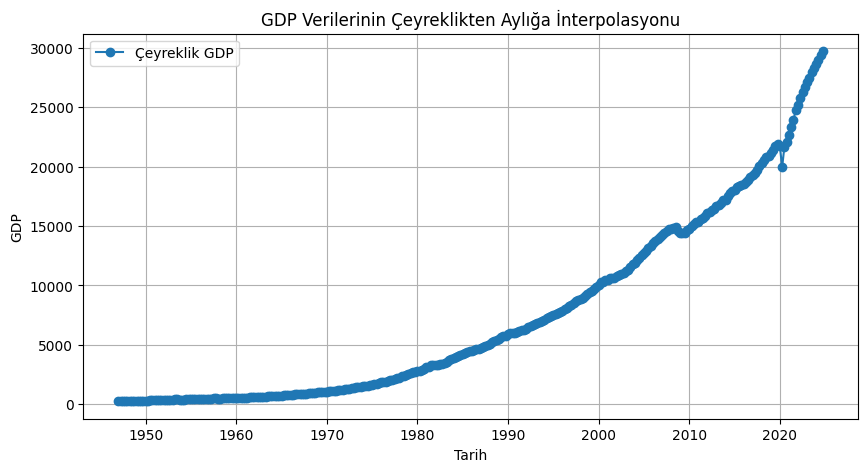

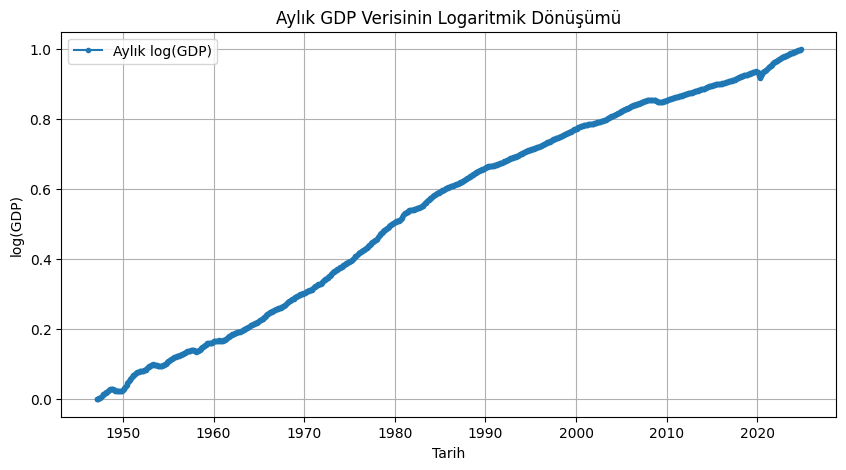

In [ ]:
scaler10 = MinMaxScaler()

df = pd.read_csv(root + 'GDP.csv', parse_dates=['observation_date'])
df.set_index('observation_date', inplace=True)

# 2) Orijinal veriyi kontrol et
print(df.head())


# 3) Aylığa yükseltme: 'ME' (ay sonu) frekansı kullanıyoruz
df_monthly = df.resample('ME').mean()  # Aylık ortalamalar
df_monthly_interpolated = df_monthly.interpolate(method='linear')

# 4) Logaritma dönüşümü: Yeni sütun oluşturuyoruz, böylece orijinal GDP değeri korunmuş oluyor.
df_monthly_interpolated['GDP'] = scaler10.fit_transform(np.log(df_monthly_interpolated['GDP']).values.reshape(-1, 1))
df_gdp_filtered = df_monthly_interpolated.loc['1976-05-01':'2024-01-01']
print(df_gdp_filtered.head())
print(df_gdp_filtered.tail())
print(df_gdp_filtered.shape)

df_gdp_filtered = df_gdp_filtered['GDP'].to_numpy().reshape(-1, 1)

print(df_gdp_filtered[:5])
# 5) İlk grafik: Çeyreklik ve interpolasyonlu aylık GDP (orijinal değerler)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['GDP'], marker='o', linestyle='-', label='Çeyreklik GDP')
plt.title('GDP Verilerinin Çeyreklikten Aylığa İnterpolasyonu')
plt.xlabel('Tarih')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

# 6) İkinci grafik: Aylık GDP verisinin logaritmik dönüşümü
plt.figure(figsize=(10, 5))
plt.plot(df_monthly_interpolated.index, df_monthly_interpolated['GDP'], marker='.', linestyle='-', label='Aylık log(GDP)')
plt.title('Aylık GDP Verisinin Logaritmik Dönüşümü')
plt.xlabel('Tarih')
plt.ylabel('log(GDP)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_Inverted_Yield["DATE"] = pd.to_datetime(data_Inverted_Yield["DATE"])
data_Inverted_Yield.set_index('DATE', inplace = False)
for i in range(len(data_Inverted_Yield['T10Y2Y'])):
  if data_Inverted_Yield['T10Y2Y'][i] == ".":
    data_Inverted_Yield['T10Y2Y'][i] = None
data_Inverted_Yield['T10Y2Y'] = data_Inverted_Yield['T10Y2Y'].bfill()
data_Inverted_Yield['T10Y2Y'].astype(float)
data_Inverted_Yield = data_Inverted_Yield[:-8]
data_Inverted_Yield = data_Inverted_Yield["T10Y2Y"].to_numpy().reshape(-1,1)

scaler10 = MinMaxScaler()
data_Inverted_Yield = scaler10.fit_transform(data_Inverted_Yield)
print(data_Inverted_Yield[-5:])
print(data_Inverted_Yield.shape)

[[0.30034947]
 [0.37549672]
 [0.35336359]
 [0.34179879]
 [0.37645487]]
(572, 1)


<ipython-input-7-19707aaa5dcc>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_Inverted_Yield['T10Y2Y'][i] = None
<ipython-input-7-19707aaa5dcc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [ ]:
data_CLI = data_CLI.iloc[40:]
print(data_CLI.tail())
scaler1 = StandardScaler()
data_CLI_1 = data_CLI["USALOLITONOSTSAM"].to_numpy().reshape(-1,1)
data_CLI_1 = scaler1.fit_transform(data_CLI_1)
print(data_CLI_1[:5])
print(data_CLI_1[-5:])
print(data_CLI_1.shape)

           DATE  USALOLITONOSTSAM
607  2023-09-01          99.48235
608  2023-10-01          99.53435
609  2023-11-01          99.60859
610  2023-12-01          99.71788
611  2024-01-01          99.85411
[[0.89070116]
 [0.876377  ]
 [0.85407688]
 [0.8449615 ]
 [0.86628497]]
[[-0.33828765]
 [-0.29596625]
 [-0.23554433]
 [-0.14659616]
 [-0.03572225]]
(572, 1)


In [ ]:
data_Efective_Rate["DATE"] = pd.to_datetime(data_Efective_Rate['DATE'])
data_Efective_Rate.set_index('DATE', inplace = True)
monthly_Efective_Rate = data_Efective_Rate.resample('M').mean()
monthly_Efective_Rate = monthly_Efective_Rate[262:-9]

scaler2 = MinMaxScaler()
print(monthly_Efective_Rate.head())
print(monthly_Efective_Rate.tail())
print(len(monthly_Efective_Rate))

                 DFF
DATE                
1976-05-31  5.290645
1976-06-30  5.476333
1976-07-31  5.306452
1976-08-31  5.290968
1976-09-30  5.252000
             DFF
DATE            
2023-08-31  5.33
2023-09-30  5.33
2023-10-31  5.33
2023-11-30  5.33
2023-12-31  5.33
572


<ipython-input-9-a8f834e884e5>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_Efective_Rate = data_Efective_Rate.resample('M').mean()


In [ ]:
Efective_Rate = monthly_Efective_Rate["DFF"].to_numpy().reshape(-1, 1)
Efective_Rate = scaler2.fit_transform(Efective_Rate)
print(Efective_Rate[:5])
print(Efective_Rate.shape)

[[0.27514235]
 [0.28488942]
 [0.27597205]
 [0.27515928]
 [0.2731138 ]]
(572, 1)


In [ ]:
scaler = StandardScaler()
data_Unemployment_rate = data_Unemployment_rate.iloc[341:-7]
print(data_Unemployment_rate.head())
print(data_Unemployment_rate.tail())

data_Unemployment_rate_1 = data_Unemployment_rate['UNRATE'].to_numpy().reshape(-1, 1)
print(data_Unemployment_rate_1.shape)

data_Unemployment_rate_1 = scaler.fit_transform(data_Unemployment_rate_1)
print(data_Unemployment_rate_1[:5])
print(data_Unemployment_rate_1.shape)

           DATE  UNRATE
341  1976-06-01     7.6
342  1976-07-01     7.8
343  1976-08-01     7.8
344  1976-09-01     7.6
345  1976-10-01     7.7
           DATE  UNRATE
908  2023-09-01     3.8
909  2023-10-01     3.8
910  2023-11-01     3.7
911  2023-12-01     3.7
912  2024-01-01     3.7
(572, 1)
[[0.83580469]
 [0.94994586]
 [0.94994586]
 [0.83580469]
 [0.89287528]]
(572, 1)


In [ ]:
data_gold_oil_ratio = data_gold_oil_ratio[365:-8]
print(data_gold_oil_ratio.shape)
print(data_gold_oil_ratio.head())
print(data_gold_oil_ratio.tail())
data_gold_oil_ratio = data_gold_oil_ratio.rename(columns={" value" : "value"})
gold_oil = data_gold_oil_ratio["value"].to_numpy().reshape(-1, 1)

gold_oil = scaler10.fit_transform(gold_oil)

print(gold_oil.shape)
print(gold_oil[:5])

(572, 2)
           date    value
365  1976-06-01  10.3221
366  1976-07-01   9.6557
367  1976-08-01   9.0205
368  1976-09-01   8.2288
369  1976-10-01   8.3568
           date    value
932  2023-09-01  20.3601
933  2023-10-01  24.4879
934  2023-11-01  26.4557
935  2023-12-01  28.9208
936  2024-01-01  26.8840
(572, 1)
[[0.04683008]
 [0.03896884]
 [0.03147565]
 [0.02213629]
 [0.02364625]]


                       GCE
observation_date          
1976-05-31        0.477657
1976-06-30        0.478089
1976-07-31        0.478519
1976-08-31        0.479756
1976-09-30        0.480984
                       GCE
observation_date          
2023-08-31        0.986583
2023-09-30        0.987424
2023-10-31        0.988261
2023-11-30        0.989196
2023-12-31        0.990126
(572, 1)


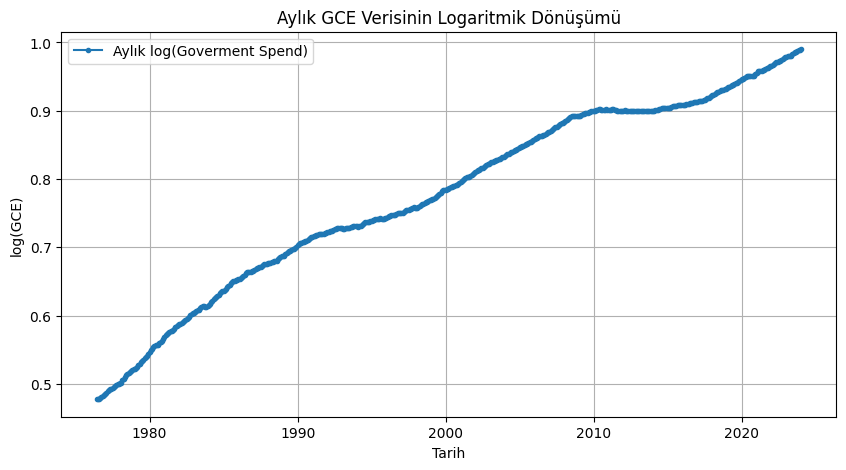

[[0.47765747]
 [0.47808886]
 [0.47851934]
 [0.47975561]
 [0.48098449]]


In [ ]:
df_goverment_spend = pd.read_csv(root + 'GCE.csv', parse_dates=['observation_date'])
df_goverment_spend.set_index('observation_date', inplace=True)

df_goverment_spend = df_goverment_spend.resample('ME').mean()
df_goverment_spend_interpolated = df_goverment_spend.interpolate(method='linear')
df_goverment_spend_interpolated['GCE'] = scaler10.fit_transform(
    np.log(df_goverment_spend_interpolated['GCE']).values.reshape(-1, 1))
df_goverment_spend_interpolated = df_goverment_spend_interpolated.loc['1976-05-01':'2024-01-01']
print(df_goverment_spend_interpolated.head())
print(df_goverment_spend_interpolated.tail())
print(df_goverment_spend_interpolated.shape)


# 6) İkinci grafik: Aylık GDP verisinin logaritmik dönüşümü
plt.figure(figsize=(10, 5))
plt.plot(df_goverment_spend_interpolated.index, df_goverment_spend_interpolated['GCE'], marker='.', linestyle='-', label='Aylık log(Goverment Spend)')
plt.title('Aylık GCE Verisinin Logaritmik Dönüşümü')
plt.xlabel('Tarih')
plt.ylabel('log(GCE)')
plt.legend()
plt.grid(True)
plt.show()
df_goverment_spend_interpolated = df_goverment_spend_interpolated['GCE'].to_numpy().reshape(-1, 1)

print(df_goverment_spend_interpolated[:5])

In [ ]:
"""gold_oil
data_Unemployment_rate_1
Efective_Rate
data_CLI_1
data_Inverted_Yield

data_rec"""

dataset_x = pd.DataFrame({'gold_oil':gold_oil[:,0],

                        'data_Unemployment_rate':data_Unemployment_rate_1[:,0],

                        'Efective_Rate':Efective_Rate[:,0],

                        'Goverment Spend':df_goverment_spend_interpolated[:, 0],

                        'data_Inverted_Yield':data_Inverted_Yield[:,0]})

print(dataset_x)

     gold_oil  data_Unemployment_rate  Efective_Rate  Goverment Spend  \
0    0.046830                0.835805       0.275142         0.477657   
1    0.038969                0.949946       0.284889         0.478089   
2    0.031476                0.949946       0.275972         0.478519   
3    0.022136                0.835805       0.275159         0.479756   
4    0.023646                0.892875       0.273114         0.480984   
..        ...                     ...            ...              ...   
567  0.165244               -1.332878       0.277208         0.986583   
568  0.213938               -1.332878       0.277208         0.987424   
569  0.237151               -1.389948       0.277208         0.988261   
570  0.266231               -1.389948       0.277208         0.989196   
571  0.242204               -1.389948       0.277208         0.990126   

     data_CLI  data_Inverted_Yield  
0    0.890701             0.590970  
1    0.876377             0.627297  
2    0.85407

In [ ]:
row_data = pd.date_range('1976-05-01','2024-01-01', freq='ME', name='Date')
dataset_x = dataset_x.set_index(row_data)
print(dataset_x.values[:5])

[[0.04683008 0.83580469 0.27514235 0.47765747 0.89070116 0.59097029]
 [0.03896884 0.94994586 0.28488942 0.47808886 0.876377   0.62729702]
 [0.03147565 0.94994586 0.27597205 0.47851934 0.85407688 0.65855866]
 [0.02213629 0.83580469 0.27515928 0.47975561 0.8449615  0.66677257]
 [0.02364625 0.89287528 0.2731138  0.48098449 0.86628497 0.71685477]]


In [ ]:
dataset_x.shape

(572, 6)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import SpatialDropout2D
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


In [ ]:
class Recession:
  def __init__(self ,n_hidden ,n_hidden_2 , n_hidden_3 ,dropout_1 ,dropout_2 , d_timesteps, d_horizon, epochss, data_x, data_y, d_train_samples, n_batch_size ,parameter_len, frame_size):
    self.n_hidden = n_hidden
    self.n_hidden_2 = n_hidden_2
    self.n_hidden_3 = n_hidden_3
    self.d_timesteps = d_timesteps
    self.dropout_1 = dropout_1
    self.dropout_2 = dropout_2
    self.d_horizon = d_horizon
    self.epochss = epochss
    self.data_x = data_x
    self.data_y = data_y
    self.parameter_len = parameter_len
    self.d_train_samples = d_train_samples
    self.n_batch_size = n_batch_size
    self.create_dataset()
    self.frame_size = frame_size

  def create_dataset(self):
    self.data_x_mod = []

    # Bir sequence oluşturmak için kullanılan toplam satır sayısı = 12 (frame boyutu) + (10 - 1) = 21
    num_samples = len(self.data_x) - 21 + 1  # 572 - 21 + 1 = 552

    for i in range(num_samples):
        sequence = []
        for t in range(10):  # 10 time step
            # Her time step için: i+t'ten i+t+12'ye kadar olan satırlar frame oluşturur
            frame = self.data_x.iloc[i + t : i + t + self.d_timesteps].values  # Şekil: (12, 5)
            # Channels_last formatı için, kanalı ekleyelim: (12, 5) -> (12, 5, 1)
            frame = frame.reshape(self.d_timesteps, self.parameter_len, 1)
            sequence.append(frame)
        self.data_x_mod.append(sequence)

    # Listeyi NumPy dizisine çeviriyoruz.
    self.data_x_mod = np.array(self.data_x_mod)


    self.data_y_mod = np.array(self.data_y[self.d_horizon + self.d_timesteps + 10 -2: len(self.data_x) + self.d_horizon])

    split_index = round(len(self.data_x_mod) * self.d_train_samples)

    train_x = self.data_x_mod[:split_index]
    train_y = self.data_y_mod[:split_index]

    test_x = self.data_x_mod[split_index:]
    test_y = self.data_y_mod[split_index:]

    self.train_x = train_x
    self.train_y = train_y
    self.test_x = test_x
    self.test_y = test_y

  def train_LSTM(self):
      self.model = Sequential()

      # 1. ConvLSTM2D katmanı
      self.model.add(ConvLSTM2D(
          filters=self.n_hidden,
          kernel_size=(5, 5),
          input_shape=(10, self.d_timesteps, self.parameter_len, 1),  # time, rows, cols, channels
          padding='same',
          return_sequences=True,
          activation='tanh'
      ))
      self.model.add(BatchNormalization())
      self.model.add(SpatialDropout2D(self.dropout_1))

      # 2. ConvLSTM2D katmanı
      self.model.add(ConvLSTM2D(
          filters=self.n_hidden_2,
          kernel_size=(3, 3),
          padding='same',
          return_sequences=True,
          activation='tanh'
      ))
      self.model.add(BatchNormalization())
      self.model.add(SpatialDropout2D(self.dropout_2))



      # 3. ConvLSTM2D katmanı (return_sequences=False)
      self.model.add(ConvLSTM2D(
          filters=self.n_hidden_3,
          kernel_size=(3, 3),
          padding='same',
          return_sequences=False,
          activation='relu'
      ))
      self.model.add(BatchNormalization())

      # Flatten ile 2D çıktıyı vektöre dönüştür
      self.model.add(Flatten())

      self.model.add(Dense(1, activation='linear'))

      self.model.compile(
        loss='mean_squared_error',   # veya 'mean_absolute_error'
        optimizer='adam',            # learning_rate param. denenebilir
        metrics=['accuracy']
      )
      # Callback ayarlar
      # Eğitim
      self.model.fit(
          self.train_x,
          self.train_y,
          epochs=self.epochss,
          batch_size=self.n_batch_size,
          shuffle=False,
          verbose=1)
      print("")

  def evaluate_LSTM(self):
    print("Evaluating!")

    self.e_prediction = self.model.predict(self.test_x ,batch_size=1 ,verbose=0)

    self.e_positive_negative = [
        [self.e_prediction[i, 0] for i in range(len(self.test_y)) if self.test_y[i, 0] == 1],
        [self.e_prediction[i, 0] for i in range(len(self.test_y)) if self.test_y[i, 0] == 0]
    ]
    self.e_fpr, self.e_tpr, self.e_threshold = metrics.roc_curve(self.test_y, self.e_prediction)
    self.e_roc_auc = metrics.auc(self.e_fpr, self.e_tpr)

  def add_bars(self, data):
    start = 0
    end = 0
    for i, prediction in enumerate(data):
        if (prediction[0] == 1):
            if (i == 0):
                start = i
            elif (i == len(data) - 1):
                if (data[i - 1, 0] != 1):
                    start = i
                    end = i + 1
                    plt.axvspan(start, end, color='0.75', alpha=0.5, lw=0)
                else:
                    end = i + 1
                    plt.axvspan(start, end, color='0.75', alpha=0.5, lw=0)
            elif (data[i - 1, 0] != 1):
                start = i

        if (prediction[0] == 0):
            if (data[i - 1, 0] == 1):
                end = i
                plt.axvspan(start, end, color='0.75', alpha=0.5, lw=0)

  def display_results(self):
      # 1. Gerçek değerler ile tahminlerin zamana göre çizimi
      plt.figure(1)
      plt.title('Gerçek Değerler vs. Tahminler (Zamana Göre)')
      plt.plot(self.e_prediction, label='Tahmin', linestyle='--')
      plt.plot(self.test_y, label='Gerçek', alpha=0.8)
      plt.xlabel("Örnekler / Zaman")
      plt.ylabel("Değer")
      plt.legend()

      # 2. Gerçek değerler ile tahminler arasındaki ilişki (Scatter Plot)
      plt.figure(2)
      plt.title('Gerçek Değerler vs. Tahminler (Scatter Plot)')
      plt.scatter(self.test_y, self.e_prediction, alpha=0.5)
      # y = x referans çizgisi (ideal durum)
      min_val = min(min(self.test_y), min(self.e_prediction))
      max_val = max(max(self.test_y), max(self.e_prediction))
      plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal')
      plt.xlabel("Gerçek Değerler")
      plt.ylabel("Tahminler")
      plt.legend()

      # 3. Hata (Residual) dağılımı
      residuals = self.test_y - self.e_prediction
      plt.figure(3)
      plt.title('Hata (Residual) Dağılımı')
      plt.hist(residuals, bins=30, color='green', alpha=0.7)
      plt.xlabel("Hata (Gerçek - Tahmin)")
      plt.ylabel("Frekans")

      plt.tight_layout()
      plt.show()

  def save_LSTM(self, path):
    self.model.save(path)

  def load_LSTM(self, path):
    self.model = load_model(path)

In [ ]:
data_recession_state = data_recession_state.iloc[161:]


In [ ]:
data_recession_state.tail()

,Date,Recession State
608,01-09-2013,0
609,01-10-2013,0
610,01-11-2013,0
611,01-12-2013,0
612,01-01-2014,0


In [ ]:
a = np.zeros((123))

data = {
    'Date': pd.date_range(start='2014-01-01',end='2024-04-01', freq='M'),
    'Recession State': a
}
data = pd.DataFrame(data)
data_rec = pd.concat([data_recession_state, data])
target_date1 = "2020-02-29 00:00:00"
target_date2 = "2020-03-31 00:00:00"
target_date3 = "2020-04-39 00:00:00"
data_rec.at[73, 'Recession State'] = 1
data_rec.at[74, 'Recession State'] = 1
data_rec.at[75, 'Recession State'] = 1


data_rec = data_rec['Recession State'].to_numpy().reshape(-1,1)


print(len(data_rec))
print(data_rec.shape)


575
(575, 1)


<ipython-input-67-823e87a7ee58>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2014-01-01',end='2024-04-01', freq='M'),


In [ ]:
def parse_data(dataset_x_set, data_rex_set):
  data_x_values = dataset_x_set
  data_y_values =  data_rex_set
  return data_x_values, data_y_values



In [ ]:
if __name__ == "__main__":
    data_x, data_y = parse_data(dataset_x, df_gdp_filtered)
    pred = Recession(300 ,200 ,100 ,0.2 ,0.1 ,12 ,3 ,10 ,data_x ,data_y ,0.8 ,32 ,6 ,3)
    pred.train_LSTM()
    pred.evaluate_LSTM()
    pred.display_results()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
 1/14 ━━━━━━━━━━━━━━━━━━━━ 7:58 37s/step - accuracy: 0.0000e+00 - loss: 1.0445

KeyboardInterrupt: 

In [ ]:
    pred.evaluate_LSTM()